In [1]:
import yfinance as yf
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data=yf.download('TSLA',period='2y')
print(data.head(5))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14824\1914413886.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download('TSLA',period='2y')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2023-06-14  256.790009  261.570007  250.500000  260.170013  170575500
2023-06-15  255.899994  258.950012  247.289993  248.399994  160171200
2023-06-16  260.540009  263.600006  257.209991  258.920013  167563700
2023-06-20  274.450012  274.750000  261.119995  261.500000  165611200
2023-06-21  259.459991  276.989990  257.779999  275.130005  211797100


In [3]:
data['NextClose']=data['Close'].shift(-1) 
data.dropna(inplace=True)

In [4]:
data.columns

MultiIndex([(    'Close', 'TSLA'),
            (     'High', 'TSLA'),
            (      'Low', 'TSLA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'TSLA'),
            ('NextClose',     '')],
           names=['Price', 'Ticker'])

In [5]:
#seperat features and labels
X=data[['High','Low','Open','Volume']]
y=data['NextClose']

In [6]:
print(X.head())

print('\n')

print(y.head())

Price             High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA       TSLA
Date                                                     
2023-06-14  261.570007  250.500000  260.170013  170575500
2023-06-15  258.950012  247.289993  248.399994  160171200
2023-06-16  263.600006  257.209991  258.920013  167563700
2023-06-20  274.750000  261.119995  261.500000  165611200
2023-06-21  276.989990  257.779999  275.130005  211797100


Date
2023-06-14    255.899994
2023-06-15    260.540009
2023-06-16    274.450012
2023-06-20    259.459991
2023-06-21    264.609985
Name: NextClose, dtype: float64


In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=45)

In [8]:
print(X_train.shape)

(250, 4)


In [9]:
print(X_test.shape)

(251, 4)


In [10]:
print(y_train.shape)

(250,)


In [11]:
print(y_test.shape)

(251,)


In [12]:
#use Linear regression model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred=model.predict(X_test)

In [14]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [15]:

print("MAE USING LINEAR REGRESSION :", mae)
print("RMSE USING LINEAR REGRESSION :", rmse)
print("R2 Score USING LINEAR REGRESSION :", r2)


MAE USING LINEAR REGRESSION : 7.317242444192801
RMSE USING LINEAR REGRESSION : 10.654302473715342
R2 Score USING LINEAR REGRESSION : 0.9763346006148426


In [16]:
#use Randomforest
#model2=RandomForestRegressor()
model2 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model2.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [17]:
y_pred2=model2.predict(X_test)


In [18]:
Mae=mean_absolute_error(y_test,y_pred2)
Mse=mean_squared_error(y_test,y_pred2)
R2=r2_score(y_test,y_pred2)

In [19]:
print('MeanAbsoluteError using RandomForestRegressor is :',Mae)
print('MeanSquaredError using RandomForestRegressor is :',Mse)
print('R2 score using RandomForestRegressor is :',R2)

MeanAbsoluteError using RandomForestRegressor is : 8.199876270426795
MeanSquaredError using RandomForestRegressor is : 134.64538734056748
R2 score using RandomForestRegressor is : 0.9719291687216909


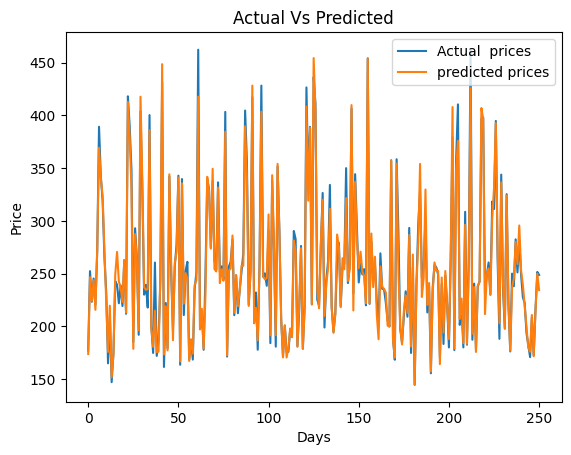

In [20]:
#Plot actual vs predicted closing prices for comparison.
plt.plot(y_test.values,label='Actual  prices')
plt.plot(y_pred,label='predicted prices')

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Actual Vs Predicted')
plt.legend()
plt.show()